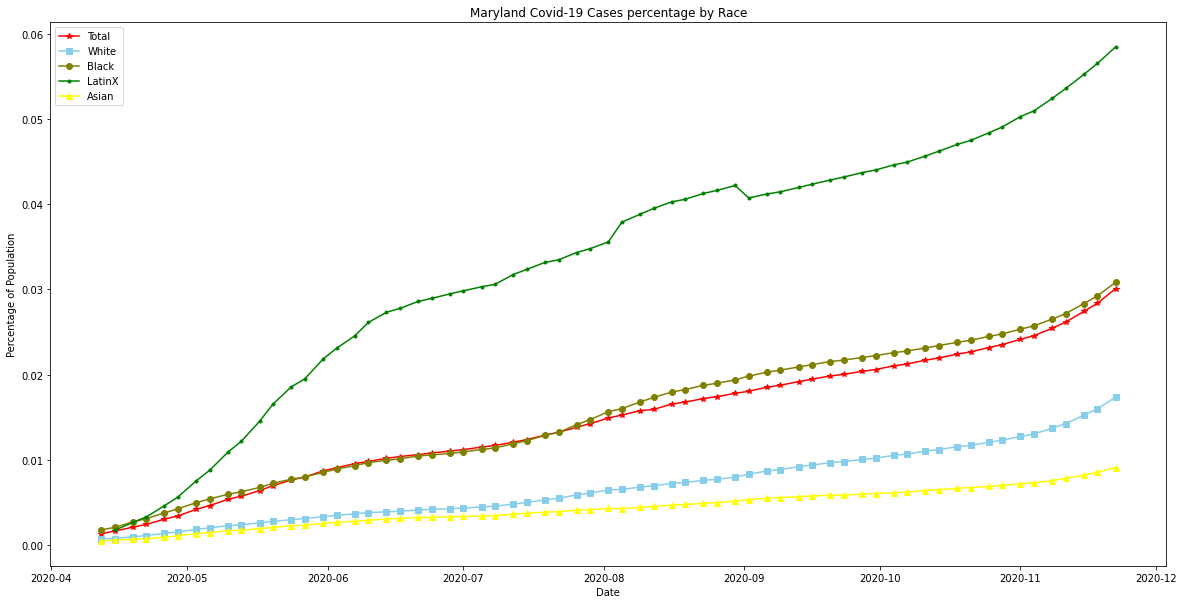

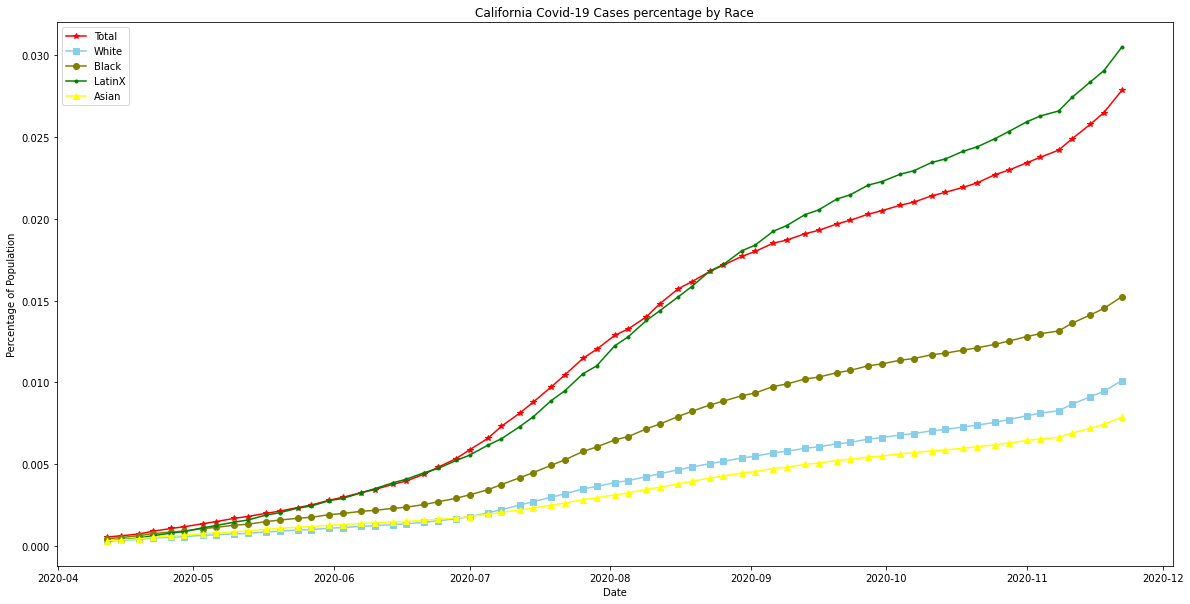

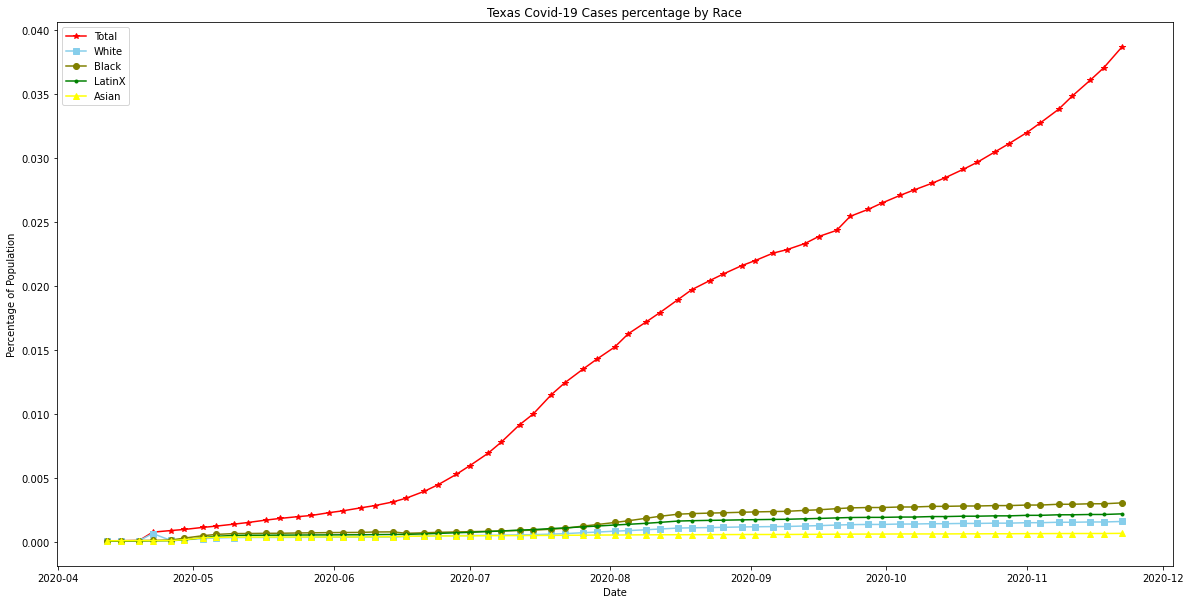

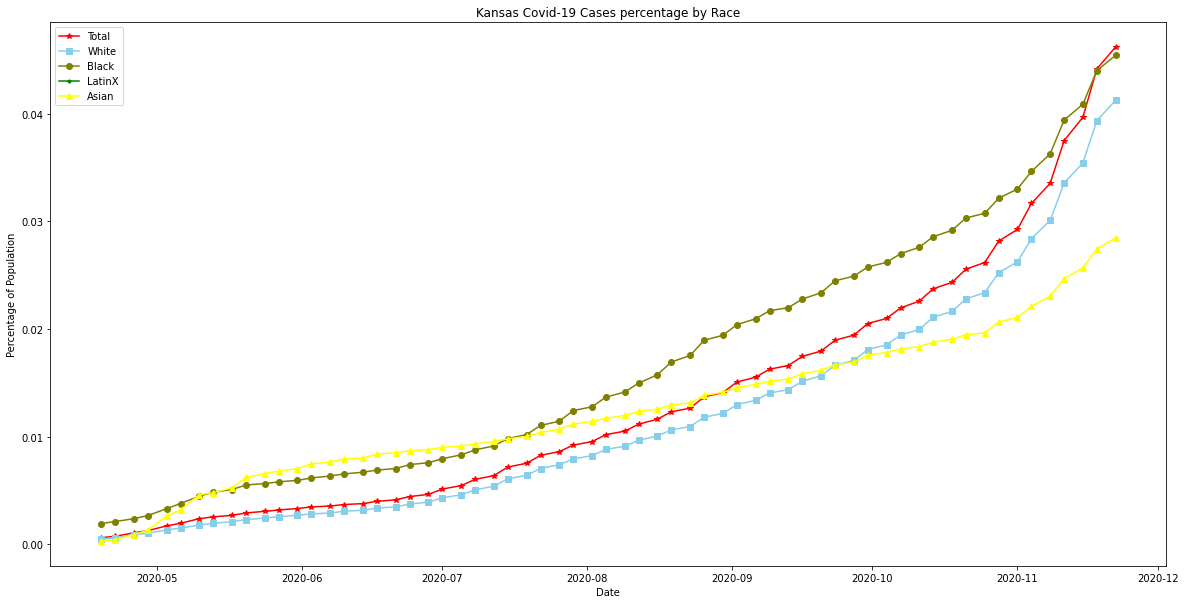

In [21]:
import csv, pandas as pd, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def racial(state, stateCode):
    populations_by_races = pd.read_csv("US_Population_By_State.csv", thousands=',')
    populations = populations_by_races.query(f"State == '{state}'")
    populations

    races = pd.read_csv("COVID-19_Race_By_States.csv")
    races = races.query(f"State == '{stateCode}'")
    races["Cases_Total_Percentage"] = pd.to_numeric(races["Cases_Total"], downcast='float').div(populations["Total population"].values[0])
    races["Cases_White_Percentage"] = pd.to_numeric(races["Cases_White"], downcast='float').div(populations["Non-Hispanic White"].values[0])
    races["Cases_Black_Percentage"] = races["Cases_Black"].div(populations["Non-Hispanic Black"].values[0])
    races["Cases_LatinX_Percentage"] = races["Cases_LatinX"].div(populations["Hispanic (of any race)"].values[0])
    races["Cases_Asian_Percentage"] = races["Cases_Asian"].div(populations["Non-Hispanic Asian"].values[0])
    
    races["Date"] = pd.to_datetime(races["Date"], format='%Y%m%d')

    plt.figure(figsize=(20,10)) 
    plt.plot(races["Date"], races["Cases_Total_Percentage"], marker="*", color='red', label='Total')
    plt.plot(races["Date"], races["Cases_White_Percentage"], marker="s", color='skyblue', label='White')
    plt.plot(races["Date"], races["Cases_Black_Percentage"], marker="o", color='olive', label='Black')
    plt.plot(races["Date"], races["Cases_LatinX_Percentage"], marker=".", color='green', label='LatinX')
    plt.plot(races["Date"], races["Cases_Asian_Percentage"], marker="^", color='yellow', label='Asian')
    plt.title(f'{state} Covid-19 Cases percentage by Race')
    plt.ylabel('Percentage of Population')
    plt.xlabel('Date')
    plt.legend()

racial("Maryland", "MD")
racial("California", "CA")
racial("Texas", "TX")
racial("Kansas", "KS")
